<a href="https://colab.research.google.com/github/melaniamorel96/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [28]:
# Unir todas las tiendas en un solo DataFrame
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Revisamos la info general
tiendas.info()
tiendas.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [29]:
# Crear columna de facturación (Precio + Costo de envío)
tiendas["Total"] = tiendas["Precio"] + tiendas["Costo de envío"]

# Facturación total
facturacion_total = tiendas["Total"].sum()
print("Facturación total:", facturacion_total)

# Facturación por tienda (suponiendo que los nombres de los archivos indican la tienda)
facturacion_por_tienda = {
    "Tienda 1": tienda["Precio"].sum() + tienda["Costo de envío"].sum(),
    "Tienda 2": tienda2["Precio"].sum() + tienda2["Costo de envío"].sum(),
    "Tienda 3": tienda3["Precio"].sum() + tienda3["Costo de envío"].sum(),
    "Tienda 4": tienda4["Precio"].sum() + tienda4["Costo de envío"].sum(),
}
facturacion_por_tienda


Facturación total: 4638316200.0


{'Tienda 1': np.float64(1212258300.0),
 'Tienda 2': np.float64(1175828600.0),
 'Tienda 3': np.float64(1156536200.0),
 'Tienda 4': np.float64(1093693100.0)}

# 2. Ventas por categoría

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Total, dtype: float64


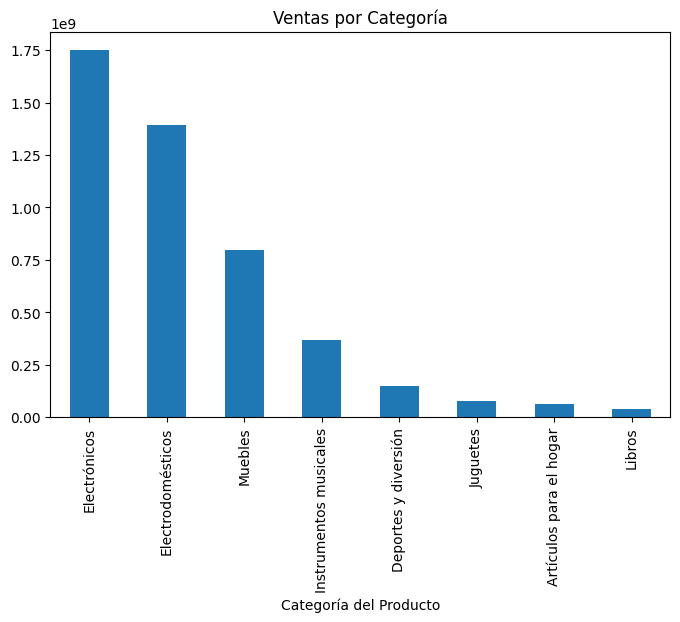

In [30]:
ventas_categoria = tiendas.groupby("Categoría del Producto")["Total"].sum().sort_values(ascending=False)
print(ventas_categoria)

# Visualización
import matplotlib.pyplot as plt

ventas_categoria.plot(kind="bar", figsize=(8,5), title="Ventas por Categoría")
plt.show()


# 3. Calificación promedio de la tienda


In [31]:
calificacion_promedio = tiendas["Calificación"].mean()
print("Calificación promedio general:", calificacion_promedio)

calificacion_por_tienda = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean(),
}
calificacion_por_tienda


Calificación promedio general: 4.014520402755696


{'Tienda 1': np.float64(3.976685036032217),
 'Tienda 2': np.float64(4.037303942348453),
 'Tienda 3': np.float64(4.048325561678677),
 'Tienda 4': np.float64(3.9957591178965224)}

# 4. Productos más y menos vendidos

Producto más vendido: Mesa de noche - 210 ventas
Producto menos vendido: Celular ABXY - 157 ventas


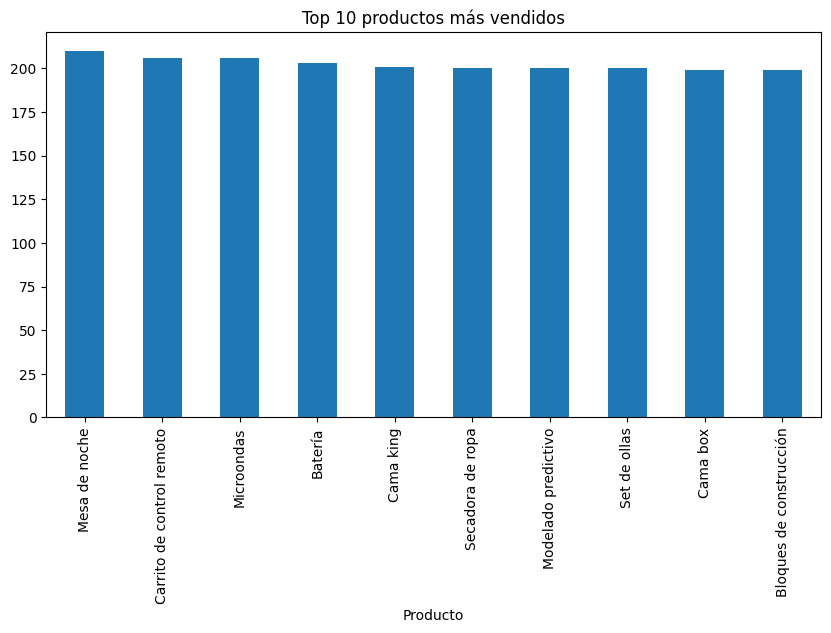

In [24]:
productos_vendidos = tiendas["Producto"].value_counts()

print("Producto más vendido:", productos_vendidos.idxmax(), "-", productos_vendidos.max(), "ventas")
print("Producto menos vendido:", productos_vendidos.idxmin(), "-", productos_vendidos.min(), "ventas")

# Top 10 productos más vendidos
productos_vendidos.head(10).plot(kind="bar", figsize=(10,5), title="Top 10 productos más vendidos")
plt.show()


# 5. Envío promedio por tienda

In [32]:
envio_promedio_por_tienda = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean(),
}
envio_promedio_por_tienda


{'Tienda 1': np.float64(26018.60958033065),
 'Tienda 2': np.float64(25216.235693090293),
 'Tienda 3': np.float64(24805.680373039424),
 'Tienda 4': np.float64(23459.457167090754)}


📊 RESUMEN AUTOMÁTICO DE INSIGHTS
💰 La tienda con mayor facturación es: Tienda 1 con un total de 1,212,258,300.00
🏷️ La categoría más vendida es: Electrónicos con un total de 1,749,038,600.00
⭐ La tienda mejor calificada es: Tienda 3 con un promedio de 4.05
📦 El producto más vendido es: Mesa de noche con 210 ventas
🚚 La tienda con menor costo de envío promedio es: Tienda 4 con un promedio de 23459.46


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


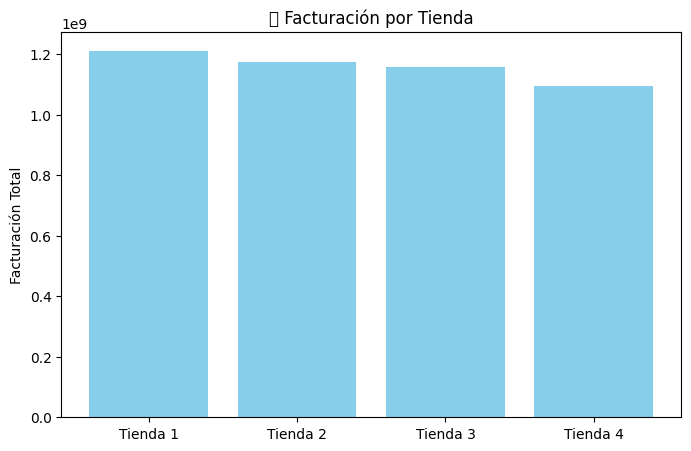

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


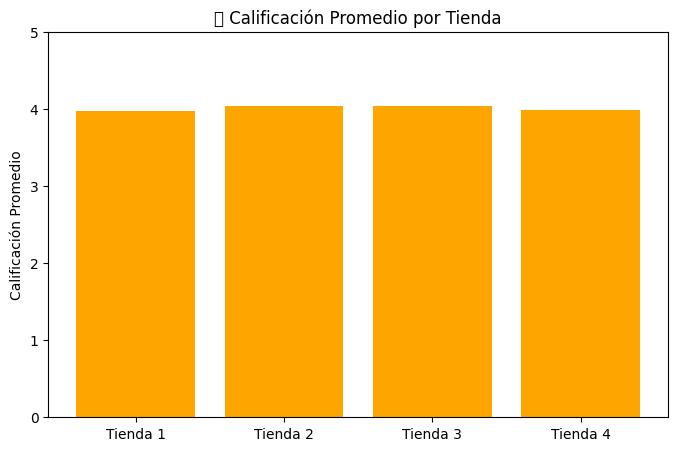

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


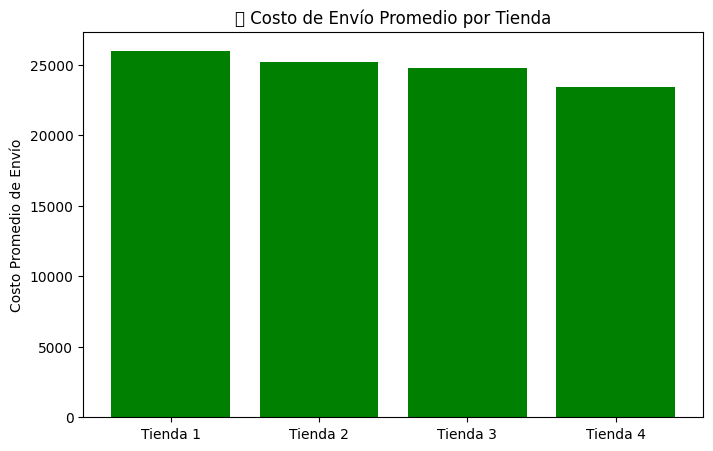

In [26]:
print("\n==============================")
print("📊 RESUMEN AUTOMÁTICO DE INSIGHTS")
print("==============================")

# Tienda con mayor facturación
tienda_mayor_facturacion = max(facturacion_por_tienda, key=facturacion_por_tienda.get)
print(f"💰 La tienda con mayor facturación es: {tienda_mayor_facturacion} con un total de {facturacion_por_tienda[tienda_mayor_facturacion]:,.2f}")

# Categoría más vendida
categoria_top = ventas_categoria.idxmax()
print(f"🏷️ La categoría más vendida es: {categoria_top} con un total de {ventas_categoria.max():,.2f}")

# Tienda con mejor calificación
tienda_mejor_calificacion = max(calificacion_por_tienda, key=calificacion_por_tienda.get)
print(f"⭐ La tienda mejor calificada es: {tienda_mejor_calificacion} con un promedio de {calificacion_por_tienda[tienda_mejor_calificacion]:.2f}")

# Producto más vendido
print(f"📦 El producto más vendido es: {productos_vendidos.idxmax()} con {productos_vendidos.max()} ventas")

# Tienda con envío más barato
tienda_envio_barato = min(envio_promedio_por_tienda, key=envio_promedio_por_tienda.get)
print(f"🚚 La tienda con menor costo de envío promedio es: {tienda_envio_barato} con un promedio de {envio_promedio_por_tienda[tienda_envio_barato]:.2f}")

# ==========================================================
# 📊 7. Visualización comparativa entre tiendas
# ==========================================================
import matplotlib.pyplot as plt

# --- Gráfico de facturación por tienda ---
plt.figure(figsize=(8,5))
plt.bar(facturacion_por_tienda.keys(), facturacion_por_tienda.values(), color="skyblue")
plt.title("💰 Facturación por Tienda")
plt.ylabel("Facturación Total")
plt.show()

# --- Gráfico de calificación promedio por tienda ---
plt.figure(figsize=(8,5))
plt.bar(calificacion_por_tienda.keys(), calificacion_por_tienda.values(), color="orange")
plt.title("⭐ Calificación Promedio por Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0,5)  # escala de calificación
plt.show()

# --- Gráfico de costo de envío promedio por tienda ---
plt.figure(figsize=(8,5))
plt.bar(envio_promedio_por_tienda.keys(), envio_promedio_por_tienda.values(), color="green")
plt.title("🚚 Costo de Envío Promedio por Tienda")
plt.ylabel("Costo Promedio de Envío")
plt.show()
